In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter, FuncFormatter

pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 50)
pd.options.display.float_format = '{:,.4f}'.format

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.style.use("fivethirtyeight")

# Makes graphs crisp. Only use if you don't have a lot of points/lines on your graph.
%config InlineBackend.figure_formats = ['svg', 'retina'] # use svg, then retina if svg is not supported

In [2]:
helper_dir = '../helper'

%run {helper_dir}/defillama.py
%run {helper_dir}/plot.py

In [3]:
obj = DefiLlama()

## Get historical DeFi TVL on all chains

In [4]:
df = obj.get_defi_hist_tvl()
df.tail()

,tvl
date,
2022-09-22,"71,652,475,950.7482"
2022-09-23,"74,883,947,608.7342"
2022-09-24,"74,888,660,847.1326"
2022-09-25,"74,471,680,390.8651"
2022-09-26,"74,154,063,942.4320"


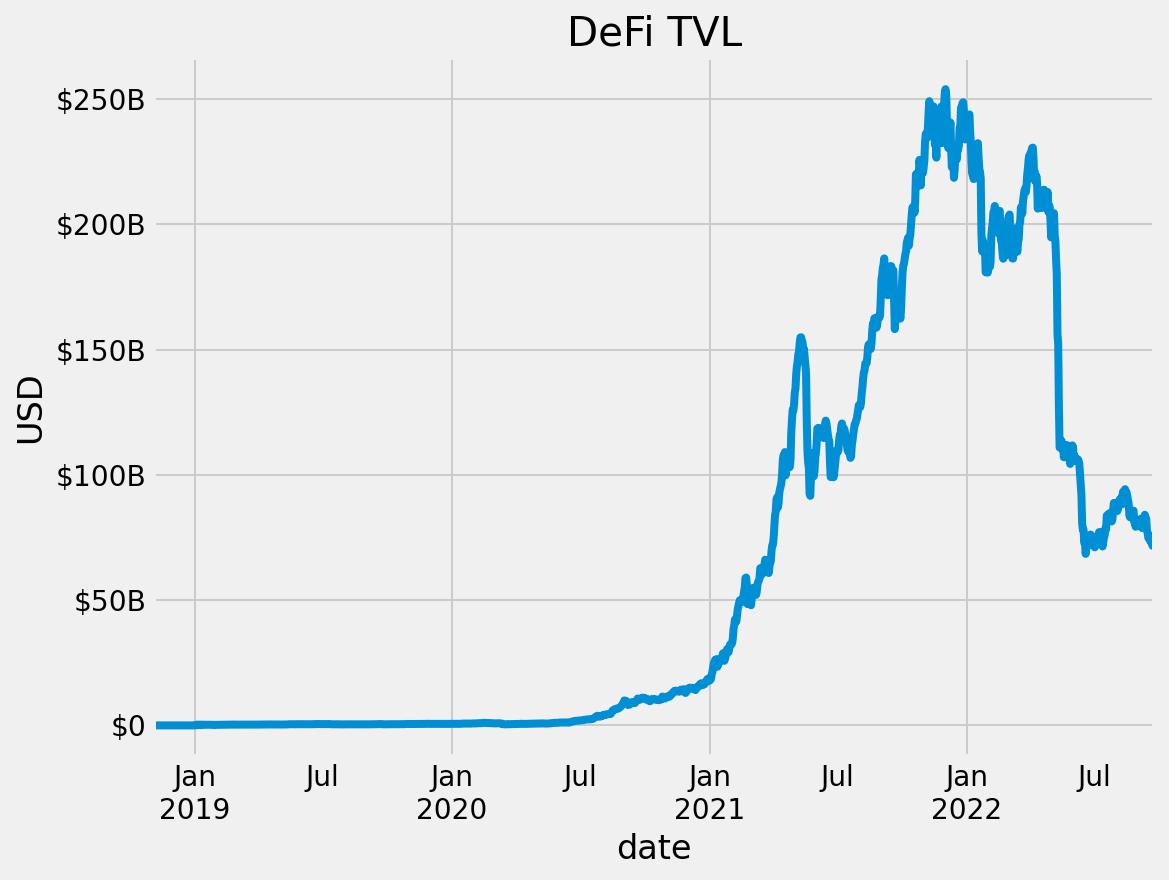

In [5]:
ax = df.tvl.plot()
dollar_formatter = FuncFormatter(human_format_dollar_or_num(dollar=True, decimals=0))
ax.yaxis.set_major_formatter(dollar_formatter)
plt.ylabel("USD")
plt.title("DeFi TVL");

## Get historical TVL of a chain

In [6]:
df = obj.get_chain_hist_tvl('Arbitrum')
df.tail()

,tvl
date,
2022-09-22,"956,964,038.4724"
2022-09-23,"998,126,173.8881"
2022-09-24,"1,006,622,063.0478"
2022-09-25,"1,003,807,524.3957"
2022-09-26,"1,014,581,978.1000"


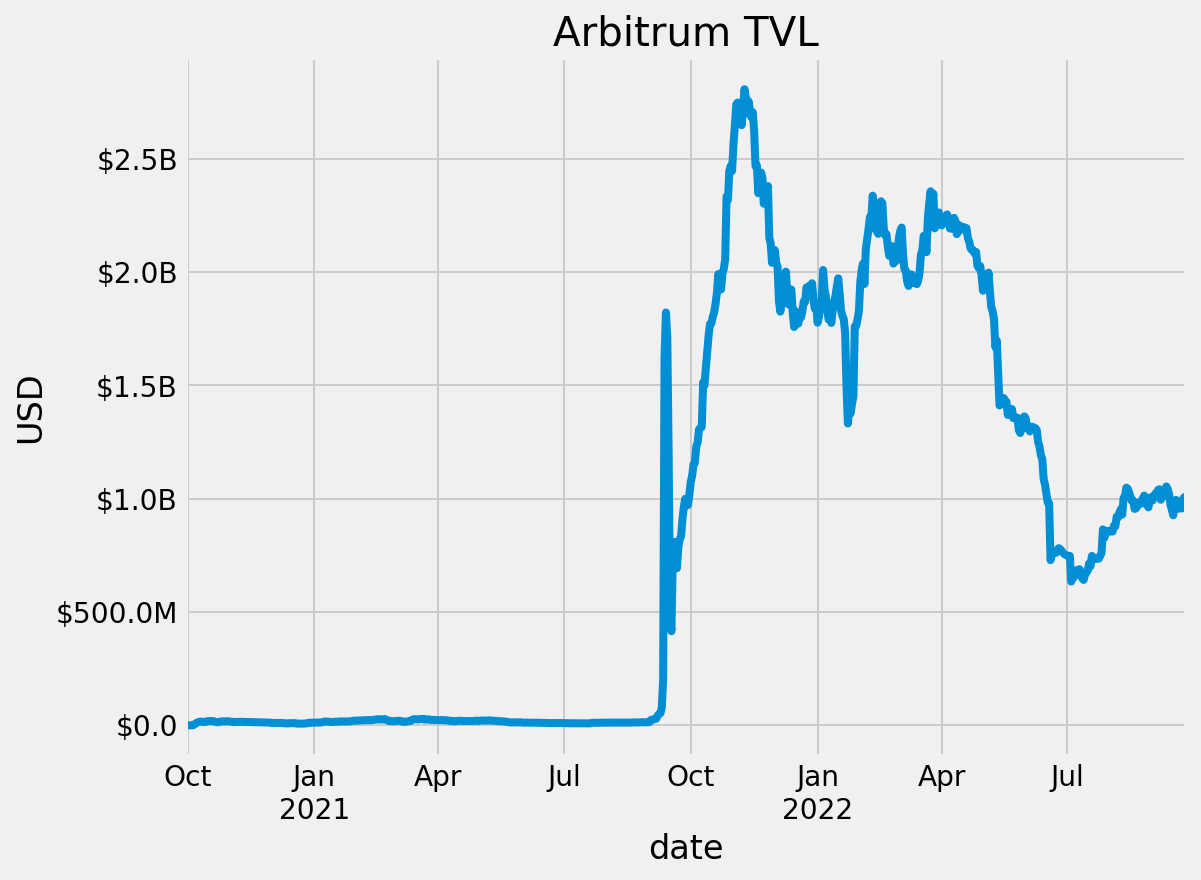

In [7]:
ax = df.tvl.plot()
dollar_formatter = FuncFormatter(human_format_dollar_or_num(dollar=True, decimals=1))
ax.yaxis.set_major_formatter(dollar_formatter)
plt.ylabel("USD")
plt.title("Arbitrum TVL");

## Get current TVL of all chains

In [8]:
df = obj.get_chains_curr_tvl()

# print top 20 chains by tvl
df = df.sort_values('tvl', ascending=False) 
df.head(20)

,token,tvl
chain,,
Ethereum,ETH,"47,869,408,448.2928"
Binance,BNB,"6,472,609,207.9992"
Tron,TRON,"5,337,193,484.6561"
Solana,SOL,"2,005,602,153.2333"
Avalanche,AVAX,"1,924,067,784.9694"
Polygon,MATIC,"1,443,353,940.8492"
Arbitrum,None,"1,014,581,978.1000"
Optimism,OP,"928,825,111.3978"
Cronos,CRO,"754,817,453.1079"


## Get current TVL of a protocol

In [9]:
obj.get_protocol_curr_tvl('gmx')

443339794.28236383

In [10]:
obj.get_protocol_curr_tvl('premia')

7411380.9281603

In [11]:
# but it doesn't always work, for example, can't pull AAVE
obj.get_protocol_curr_tvl('aave')

{'message': 'Protocol is not in our database'}

In [12]:
# Remark: this is no issue since we can get current TVL of a protocol using another method. See next section.

## Get current TVL of a protocol by chain

In [13]:
df = obj.get_protocol_curr_tvl_by_chain('gmx')
df

,tvl
Avalanche,"63,663,803.6019"
Avalanche-staking,"15,860,239.2309"
Arbitrum-staking,"257,149,994.7254"
Arbitrum,"379,675,990.6804"


In [14]:
# the current TVL can be obtained by summing the non-staking values
abs(df[~df.index.str.contains('staking')].sum() - obj.get_protocol_curr_tvl('gmx')) < 0.1

tvl    True
dtype: bool

In [15]:
df = obj.get_protocol_curr_tvl_by_chain('premia')
df

,tvl
Optimism,"1,204,460.1672"
Binance,"9,336.6275"
Ethereum,"1,843,179.3223"
Ethereum-staking,"5,111,222.7427"
Arbitrum,"3,218,669.7315"
Fantom,"1,135,735.0797"


In [16]:
# the current TVL can be obtained by summing the non-staking values
abs(df[~df.index.str.contains('staking')].sum() - obj.get_protocol_curr_tvl('premia')) < 0.1

tvl    True
dtype: bool

In [17]:
# let's now get AAVE's current TVL
df = obj.get_protocol_curr_tvl_by_chain('aave')
df[~df.index.str.contains('staking')].sum()

tvl   12,368,683,496.9460
dtype: float64

## Get historical TVL of a protocol by chain

In [18]:
dd = obj.get_protocol_hist_tvl_by_chain('gmx')

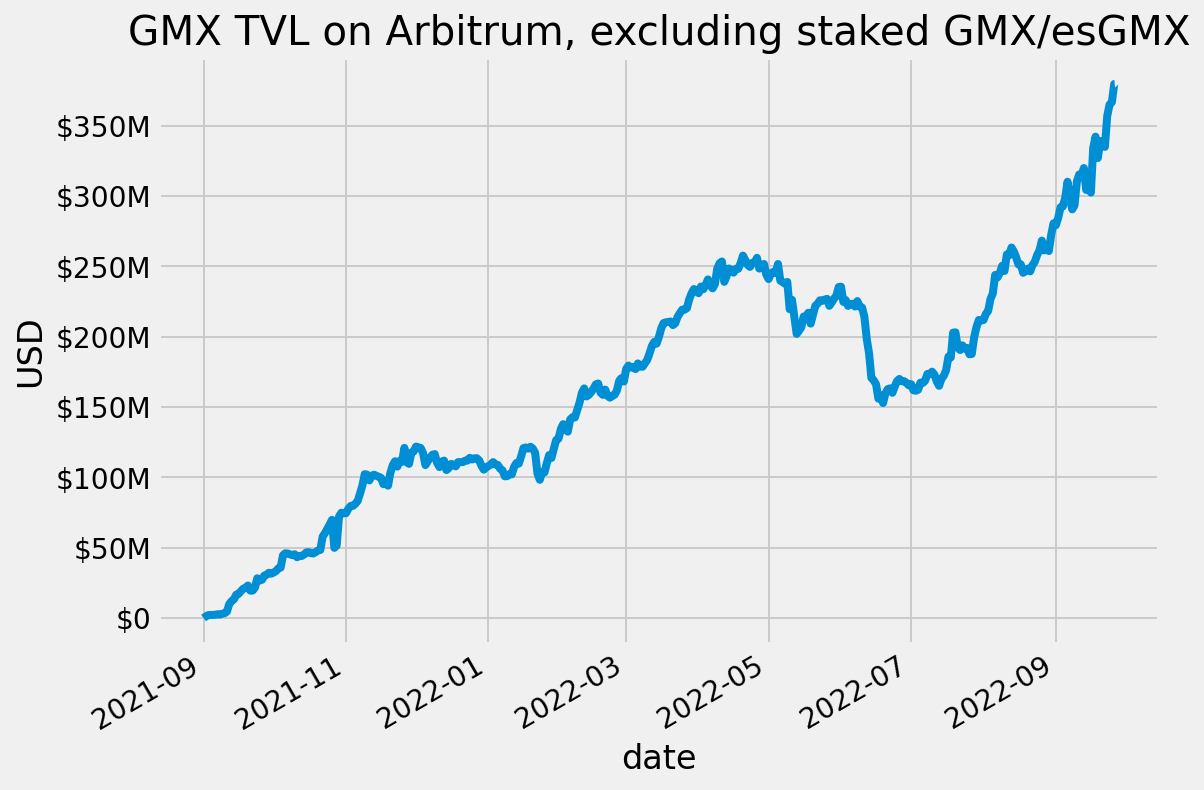

In [19]:
ax = dd['Arbitrum'].tvl.plot()
dollar_formatter = FuncFormatter(human_format_dollar_or_num(dollar=True, decimals=0))
ax.yaxis.set_major_formatter(dollar_formatter)
plt.ylabel("USD")
plt.title("GMX TVL on Arbitrum, excluding staked GMX/esGMX");

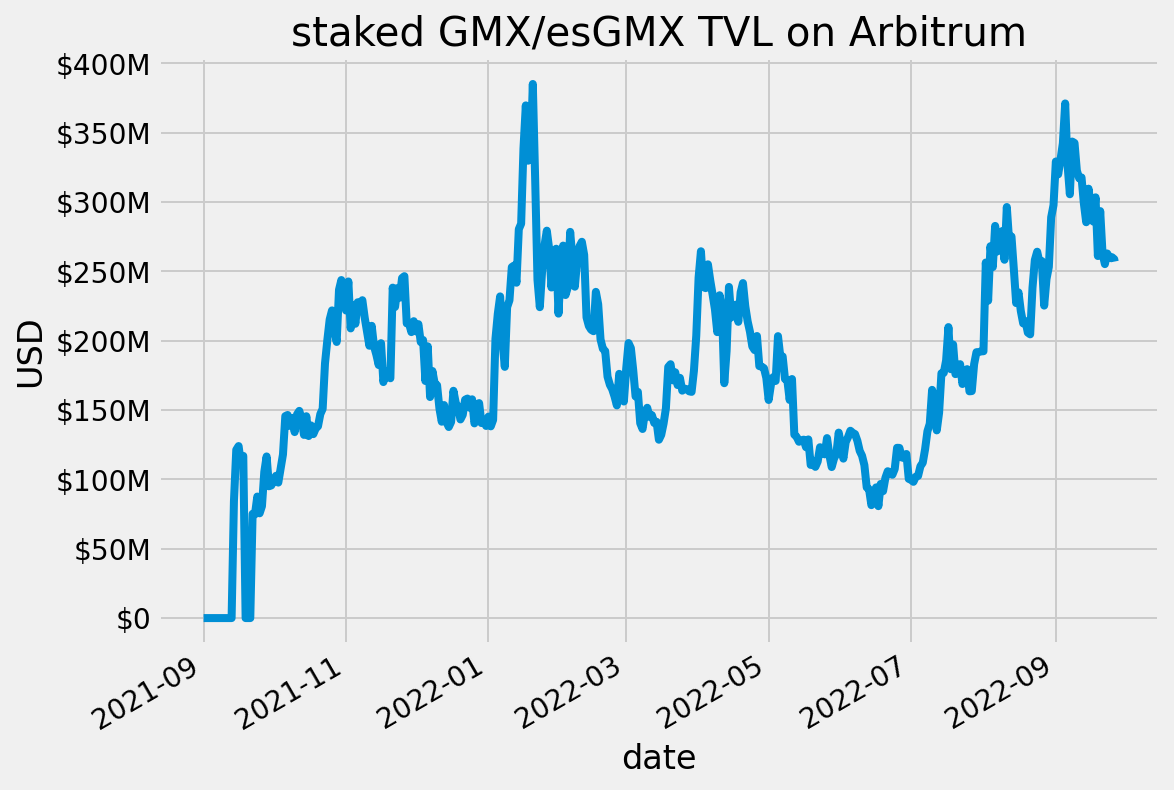

In [20]:
ax = dd['Arbitrum-staking'].tvl.plot()
ax.yaxis.set_major_formatter(dollar_formatter)
plt.ylabel("USD")
plt.title("staked GMX/esGMX TVL on Arbitrum");

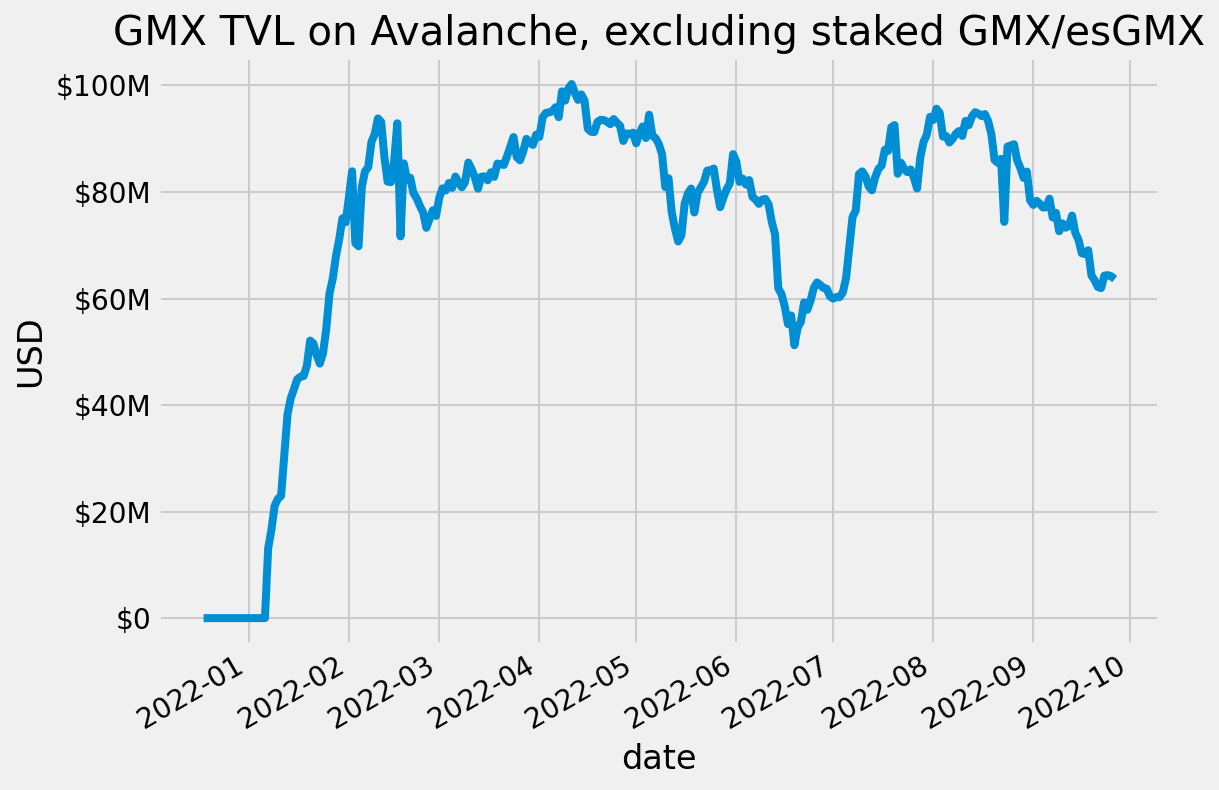

In [21]:
ax = dd['Avalanche'].tvl.plot()
ax.yaxis.set_major_formatter(dollar_formatter)
plt.ylabel("USD")
plt.title("GMX TVL on Avalanche, excluding staked GMX/esGMX");

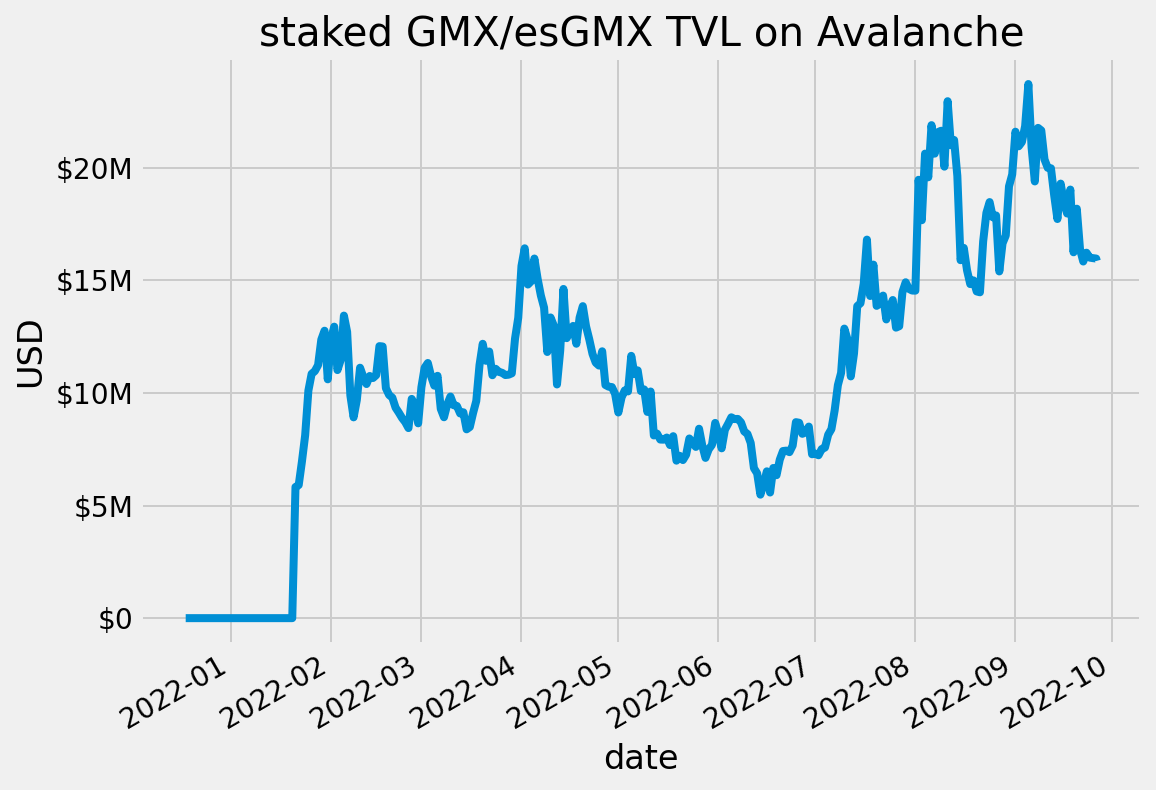

In [22]:
ax = dd['Avalanche-staking'].tvl.plot()
ax.yaxis.set_major_formatter(dollar_formatter)
plt.ylabel("USD")
plt.title("staked GMX/esGMX TVL on Avalanche");

## Get fundamentals for all protocols

In [23]:
df = obj.get_protocols_fundamentals()
df = df.sort_values('tvl', ascending=False, ignore_index=True)
df.head(10)

,name,symbol,chain,category,chains,tvl,change_1d,change_7d,fdv,mcap,forked_from
0,MakerDAO,MKR,Ethereum,CDP,[Ethereum],"7,237,450,629.7552",-0.8415,0.3348,"637,949,522.0000","571,801,949.0000",NaN
1,Polygon Bridge & Staking,MATIC,Polygon,Chain,[Polygon],"6,270,267,482.1424",-2.9658,-6.8784,"7,689,071,404.0000","5,721,821,813.0000",NaN
2,Lido,LDO,Multi-Chain,Liquid Staking,"[Ethereum, Solana, Moonbeam, Moonriver, Terra]","5,840,226,962.9310",-2.3111,0.1894,"1,568,650,697.0000","1,011,614,358.0000",NaN
3,Curve,CRV,Multi-Chain,Dexes,"[Ethereum, xDai, Polygon, Arbitrum, Avalanche,...","5,681,621,063.4482",-0.2718,11.3561,"2,945,207,735.0000","349,496,651.0000",NaN
4,Uniswap,UNI,Multi-Chain,Dexes,"[Ethereum, Arbitrum, Polygon, Optimism, Celo]","5,130,709,151.0675",-1.0881,3.3946,"5,668,536,582.0000","4,272,753,926.0000",NaN
5,WBTC,WBTC,Ethereum,Bridge,[Ethereum],"4,612,907,218.6172",-0.8237,-1.4272,"4,708,615,924.0000","4,708,615,924.0000",NaN
6,AAVE V2,AAVE,Multi-Chain,Lending,"[Ethereum, Polygon, Avalanche]","4,347,008,410.9397",-1.3194,4.0987,"1,180,372,335.0000","1,040,301,833.0000",NaN
7,Convex Finance,CVX,Ethereum,Yield,[Ethereum],"3,913,817,568.5517",-1.1774,6.6813,"476,902,279.0000","329,135,348.0000",NaN
8,JustLend,JST,Tron,Lending,[Tron],"3,144,547,182.9905",-0.8555,-0.1461,"245,994,797.0000","221,198,521.0000",NaN
9,PancakeSwap,CAKE,Binance,Dexes,[Binance],"2,890,074,391.6629",-0.3224,2.7227,"3,439,054,973.0000","675,642,702.0000",[Uniswap]


In [24]:
# find the 5 protocols with the biggest % jump in TVL in last 7 days
df.sort_values('change_7d', ascending=False, ignore_index=True).head(5)

,name,symbol,chain,category,chains,tvl,change_1d,change_7d,fdv,mcap,forked_from
0,Temple DAO,TEMPLE,Ethereum,Reserve Currency,[Ethereum],"97,854,742.4408",0.0121,"3,395.5881","214,113,008.0000","88,635,676.0000",NaN
1,Doge Compounder,-,Dogechain,Yield Aggregator,[Dogechain],162.3501,-38.6742,"2,200.8084",NaN,NaN,[Beefy]
2,RadioShack,RADIO,Multi-Chain,Dexes,"[Ethereum, Binance, Avalanche, Polygon, Cronos...","68,261,288.6917",878.2764,879.4437,NaN,"6,595,311.0000",[Uniswap]
3,Concave,CNV,Ethereum,Services,[Ethereum],"3,335,388.2226",-0.1211,560.9266,NaN,"1,155,948.0000",[]
4,Sablier Finance,-,Ethereum,Payments,[Ethereum],"374,507,591.6173",6.8927,329.8051,NaN,NaN,NaN


In [25]:
# derive other metrics
ha = (df.loc[:, ['name', 'category', 'tvl', 'fdv', 'mcap']]
        .assign(mcap_per_tvl = df.mcap / df.tvl, fdv_per_tvl = df.fdv / df.tvl)
     )
ha          

,name,category,tvl,fdv,mcap,mcap_per_tvl,fdv_per_tvl
0,MakerDAO,CDP,"7,237,450,629.7552","637,949,522.0000","571,801,949.0000",0.0790,0.0881
1,Polygon Bridge & Staking,Chain,"6,270,267,482.1424","7,689,071,404.0000","5,721,821,813.0000",0.9125,1.2263
2,Lido,Liquid Staking,"5,840,226,962.9310","1,568,650,697.0000","1,011,614,358.0000",0.1732,0.2686
3,Curve,Dexes,"5,681,621,063.4482","2,945,207,735.0000","349,496,651.0000",0.0615,0.5184
4,Uniswap,Dexes,"5,130,709,151.0675","5,668,536,582.0000","4,272,753,926.0000",0.8328,1.1048
...,...,...,...,...,...,...,...
1946,Xenophon,Reserve Currency,0.0000,NaN,NaN,NaN,NaN
1947,Whale Loans,Reserve Currency,0.0000,"35,000.0000",0.0000,NaN,inf
1948,Rarify,Yield,0.0000,NaN,NaN,NaN,NaN
1949,Galatea Cash,Algo-Stables,0.0000,NaN,NaN,NaN,NaN


In [26]:
# aggregate by category
ha.groupby('category')[['tvl', 'fdv', 'mcap']].sum()

,tvl,fdv,mcap
category,,,
Algo-Stables,"1,289,126,338.3037","41,954,999,012,257.1250","696,533,171.2500"
Bridge,"10,628,882,060.2891","5,870,195,589.0000","5,256,816,826.0000"
CDP,"9,745,782,519.8766","3,135,618,527.0000","1,254,224,148.0000"
Chain,"6,758,485,458.2942","8,501,938,288.0000","6,389,279,959.0000"
Cross Chain,"973,117,819.9732","1,248,767,814.0000","474,837,669.0000"
Derivatives,"1,196,543,886.6601","11,948,489,057,080.0000","854,103,401.0000"
Dexes,"23,453,748,920.3606","37,979,174,741.1600","13,938,019,809.1200"
Farm,"45,521,548.6592","19,579,133.8400","3,507,294.0000"
Gaming,"12,377,089.3351","3,767,485,512.0000","1,476,300,268.0000"
